In [1]:
from matplotlib import pyplot as plt
import torch
import numpy as np
from scipy import stats
import math
from typing import List, Tuple, Any

In [2]:
# Loading the arrays back
Distances = np.load('Distances_self_norm.npy', allow_pickle=True)
#Cos_distances = np.load('Cos_distances.npy', allow_pickle=True)
Norms = np.load('Norms_self_norm.npy', allow_pickle=True)


In [ ]:
# Running the scripts
%run "c:/Users/Win10/Desktop/Magistrale/Tirocinio AI-Lab/STL_explainability/Test_distance_local_matrix.py"

# Runs in 1h if the parameters lists are all of len 10

## Effect of the different parameters used on the kernels
The three parameters considered are:
1) The number of trajectories used
2) The number of formulae used (in particoular the number of forulae minus the number of trajectories)
3) The standard deviation of the distribution around the local trajectory

The euclidean and cosine distance between two types of kernels are measured:
1) Local kernels obtained by sampling around a local trajectory
2) Kernels transformed using importance sampling (starting from global distribution)

After that, the norms of the local, global and importance sampling kernels are measured with respect to the previous parameters

In [8]:
def plot_regression(data_array: np.ndarray,
                          parameter_index: int, 
                          var_index: int, 
                          ax: plt.Axes, 
                          title: str, 
                          colors: List[str]) -> Tuple[float, float, float]:
    """
    Plot individual datasets and perform regression.
    
    Args:
        data_array (np.ndarray): 3D array of data
        parameter_index (int): index of the parameter used on the x axis
        var_index (int): Index of the variable to plot
        ax (plt.Axes): Matplotlib axes to plot on
        title (str): Title for the plot
        colors (List[str]): List of colors for plotting
    
    Returns:
        Tuple of slope, intercept, and R-squared
    """

    # Store all points for combined regression
    x_points = []
    y_points = []

    # Different for loops depending on the parameter_index
    match parameter_index:
        case 0: # potting against the number of added formulae
            for idx2 in range(data_array.shape[1]):
                for idx3 in range(data_array.shape[2]):

                    # Creating the lists of points for the plot
                    #x = [data_array[idx1, idx2, idx3][parameter_index] for idx1 in range(data_array.shape[parameter_index])]
                    #y = [data_array[idx1, idx2, idx3][var_index] for idx1 in range(data_array.shape[parameter_index])]
                    x = []
                    y = []
                    for idx1 in range(data_array.shape[parameter_index]):
                        if not  math.isnan(data_array[idx1, idx2, idx3][parameter_index]):
                            x.append(data_array[idx1, idx2, idx3][parameter_index])
                            y.append(data_array[idx1, idx2, idx3][var_index])


                    ax.scatter(x, y, 
                            color=colors[idx2],
                            alpha=0.3,
                            s=5)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)

        case 1: # plotting against the number of trajectories
            for idx1 in range(data_array.shape[0]):
                for idx3 in range(data_array.shape[2]):

                    # Creating the lists of points for the plot
                    #x = [data_array[idx1, idx2, idx3][parameter_index] for idx2 in range(data_array.shape[parameter_index])]
                    #y = [data_array[idx1, idx2, idx3][var_index] for idx2 in range(data_array.shape[parameter_index])]
                    
                    x = []
                    y = []

                    for idx2 in range(data_array.shape[parameter_index]):
                        if not math.isnan(data_array[idx1, idx2, idx3][parameter_index]):
                            x.append(data_array[idx1, idx2, idx3][parameter_index])
                            y.append(data_array[idx1, idx2, idx3][var_index])


                    ax.scatter(x, y, 
                            color=colors[idx1], 
                            alpha=0.3, 
                            s=5)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)

        case 2: # plotting against the standard deviation
            for idx1 in range(data_array.shape[0]):
                for idx2 in range(data_array.shape[1]):

                    # Creating the lists of points for the plot
                    #x = [data_array[idx1, idx2, idx3][parameter_index] for idx3 in range(data_array.shape[2])]
                    #y = [data_array[idx1, idx2, idx3][var_index] for idx3 in range(data_array.shape[2])]
                    x = []
                    y = []
                    for idx3 in range(data_array.shape[2]):
                        if not math.isnan(data_array[idx1, idx2, idx3][parameter_index]):
                            x.append(data_array[idx1, idx2, idx3][parameter_index])
                            y.append(data_array[idx1, idx2, idx3][var_index])



                    ax.scatter(x, y, 
                            color=colors[idx2],
                            alpha=0.3,
                            s=5)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)
    
    # Convert to numpy arrays for regression
    x_array = np.array(x_points)
    y_array = np.array(y_points)
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_array, y_array)
    
    # Regression line
    line_x = np.array([x_array.min(), x_array.max()]).reshape(-1, 1)
    line_y = slope * line_x + intercept
    
    ax.plot(line_x, line_y, color='black', 
            linestyle='--', 
            linewidth=3,
            label=f'Combined Regression (y = {slope:.4f}x + {intercept:.4f})')
    
    # Customize plot
    xlabels = ['formulae added', 'trajectories', 'local standard deviation']
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(xlabels[parameter_index], fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return slope, intercept, r_value**2




def plotter(data: np.ndarray,
            parameter_index: int, 
            variable: str):
    """
    Create a comprehensive plot of different norms.
    
    Args:
        data (np.ndarray): 3D array containing the data
        parameter_index (int): index of the parameter used on the x axis
        variable (str): selects the plotting of the distances or the norms

    """
    # Colors for plotting
    colors = ['red', 'blue', 'green', 'purple', 'orange', 
              'teal', 'magenta', 'brown', 'olive', 'navy', 
              'coral', 'gold', 'indigo', 'lime', 'maroon']

    # Create figure and axes and various configurations for the plot
    xlabels = ['number of formulae added', 'number of trajectories', 'local standard deviation']
    if variable == "Distances":
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        configs = [
            (3, ax1, f'Effect of the {xlabels[parameter_index]} on the distance'), 
            (4, ax2, f'Effect of the {xlabels[parameter_index]} on the cos distance')
        ]
    elif variable == "Norms":
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))
        configs = [
            (3, ax1, f'Effect of the {xlabels[parameter_index]} on the global norm'),
            (4, ax2, f'Effect of the {xlabels[parameter_index]} on the local norm'),
            (5, ax3, f'Effect of the {xlabels[parameter_index]} on the importance sampling norm')
        ]

    # Plot each norm type
    regression_results = []
    for var_index, ax, title in configs:
        result = plot_regression(data, parameter_index, var_index, ax, title, colors)
        regression_results.append(result)
    
    # Print regression details
    labels = ['global', 'local', 'imp']
    for label, (slope, intercept, r_squared) in zip(labels, regression_results):
        print(f"Regression Equation norm_{label}: y = {slope}x + {intercept}")
        print(f"R² Score: {r_squared:.4f}")
    
    plt.tight_layout()
    plt.show()


Regression Equation norm_global: y = 5.014800058662397e-06x + 0.22009750240567055
R² Score: 0.0003
Regression Equation norm_local: y = 4.335073557766999e-05x + 0.16954443991184237
R² Score: 0.0016


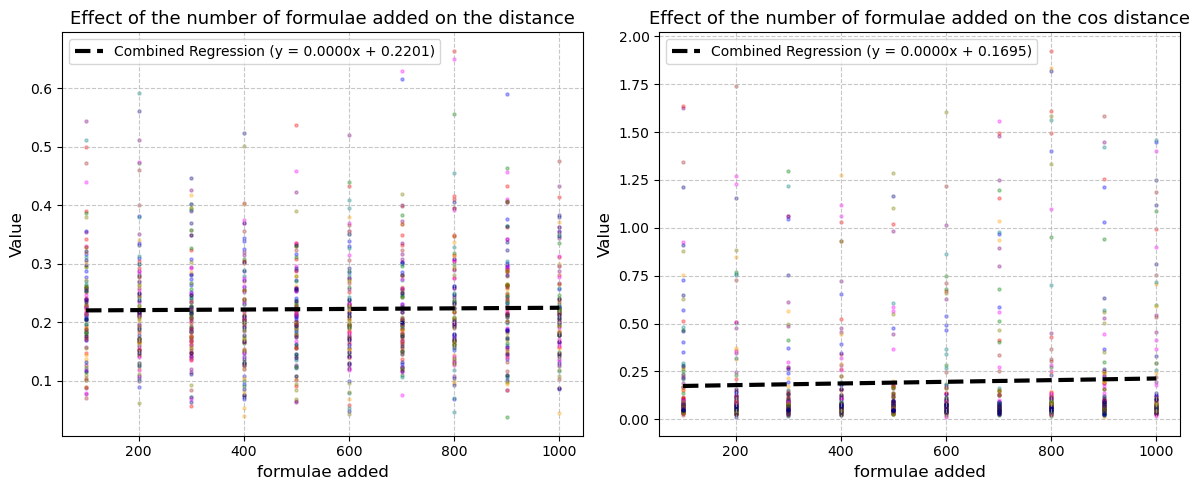

Regression Equation norm_global: y = -3.303766712628449e-05x + 0.24102635935739133
R² Score: 0.0109
Regression Equation norm_local: y = -3.511416931782873e-05x + 0.21270013760436665
R² Score: 0.0010


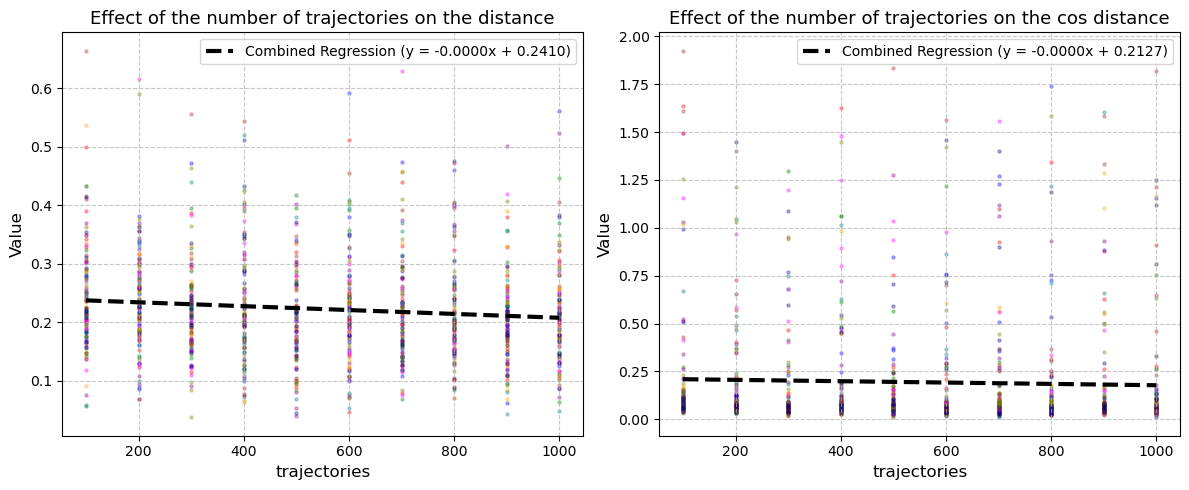

Regression Equation norm_global: y = 0.1034859082102775x + 0.14524121128022677
R² Score: 0.0325
Regression Equation norm_local: y = 0.0849993276596069x + 0.1296378487348557
R² Score: 0.0018


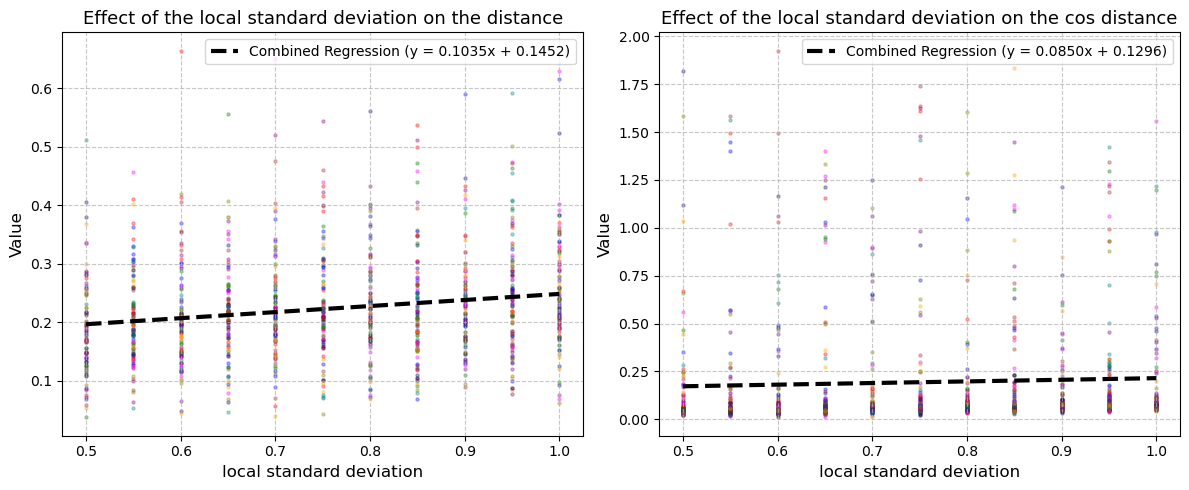

Regression Equation norm_global: y = 1.857395217889924e-05x + 0.2852347457770145
R² Score: 0.0027
Regression Equation norm_local: y = 2.8141520233932607e-05x + 0.3910250820625912
R² Score: 0.0021
Regression Equation norm_imp: y = 1.8251442498740454e-05x + 0.4508905712266763
R² Score: 0.0006


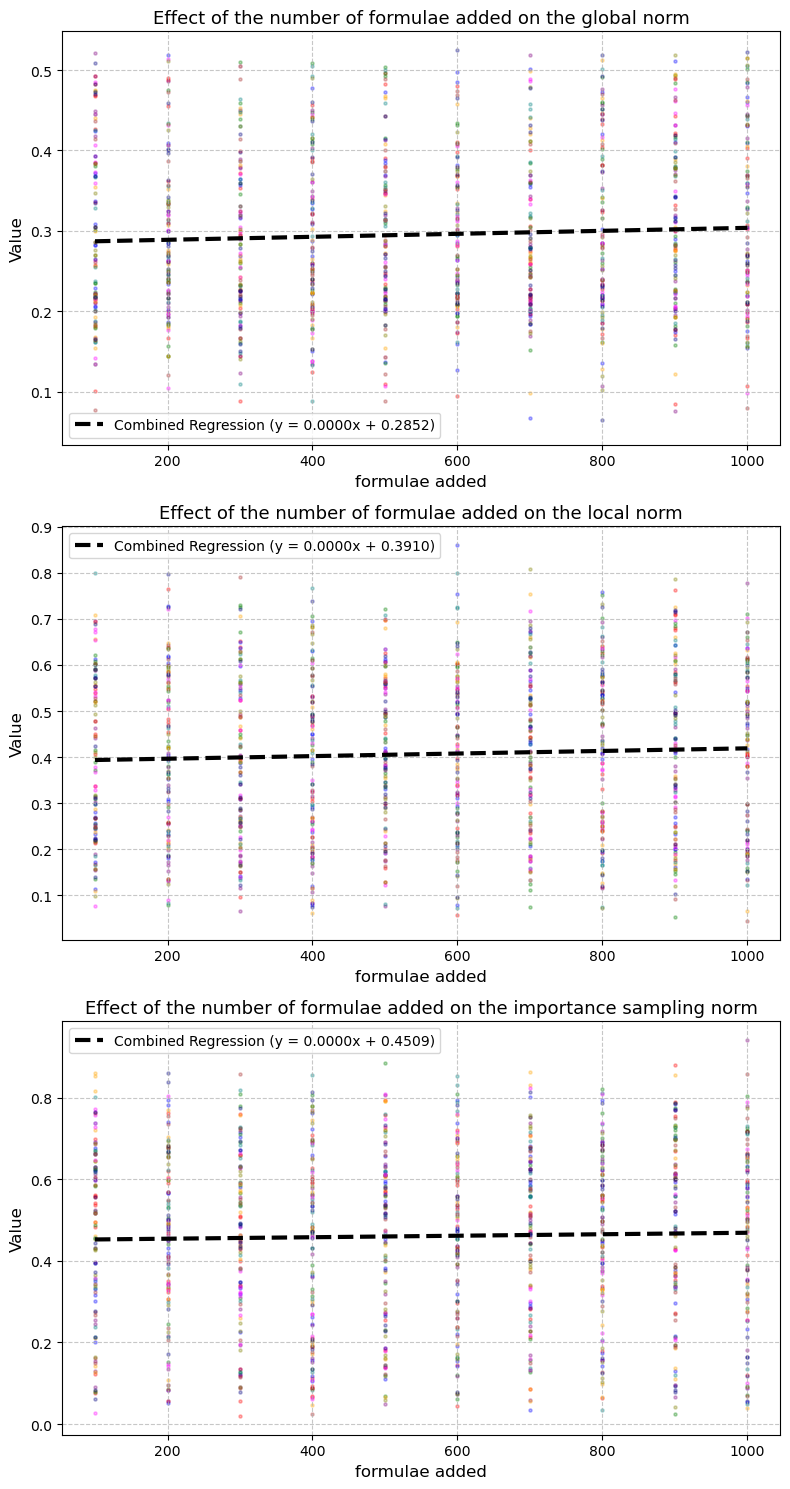

Regression Equation norm_global: y = -5.450600408243419e-06x + 0.298448249699943
R² Score: 0.0002
Regression Equation norm_local: y = -2.3103507856527973e-06x + 0.40777361112336313
R² Score: 0.0000
Regression Equation norm_imp: y = -3.310114005708825e-06x + 0.4627494273041234
R² Score: 0.0000


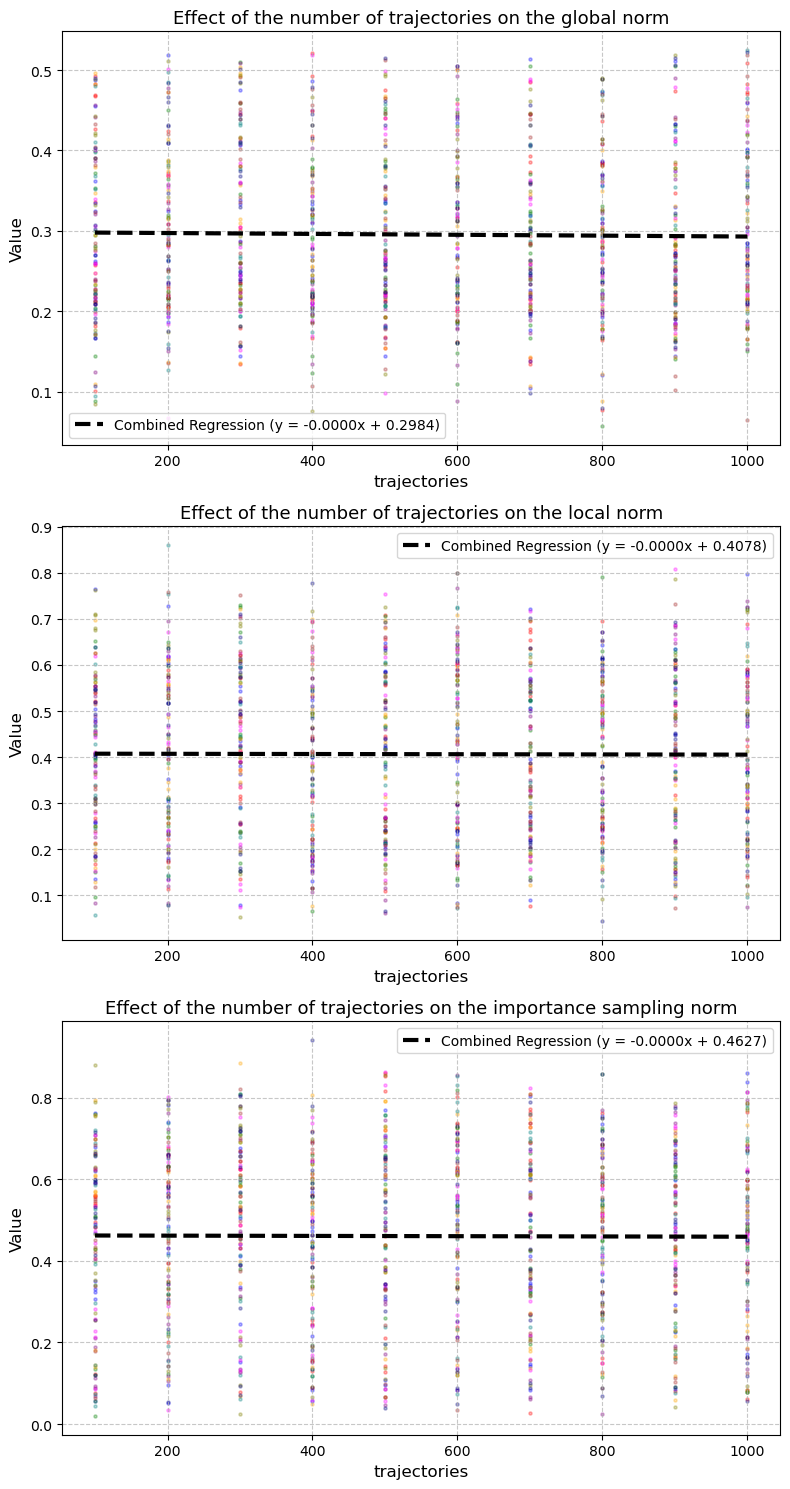

Regression Equation norm_global: y = 0.005571744482625625x + 0.2912716111134399
R² Score: 0.0001
Regression Equation norm_local: y = -0.08629658486355433x + 0.47122535683891986
R² Score: 0.0059
Regression Equation norm_imp: y = -0.04792535268786279x + 0.4968728791168806
R² Score: 0.0013


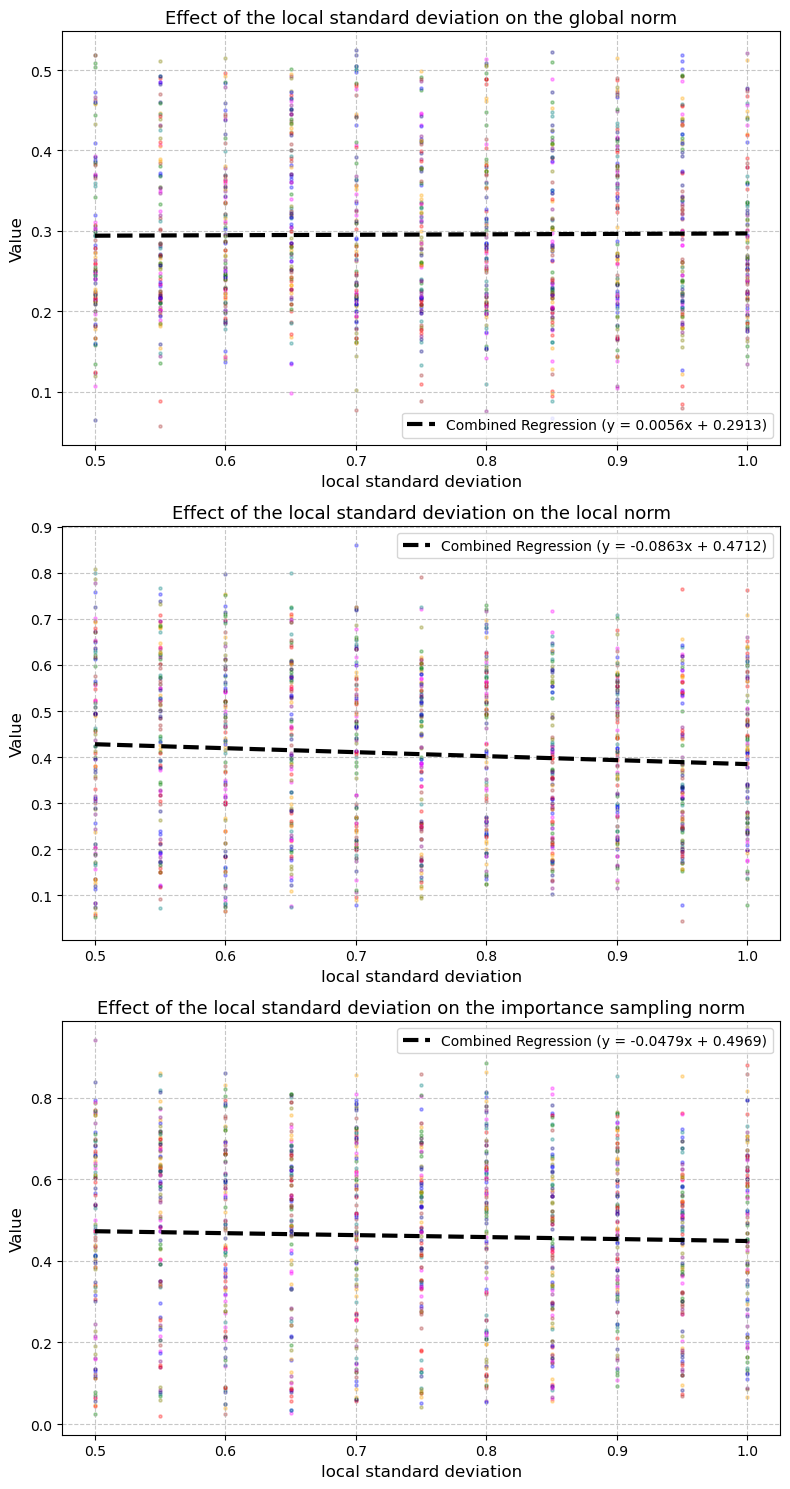

In [15]:
# Running the functions
for i in range(3):
    plotter(Distances, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms, parameter_index=i, variable="Norms")


# Conclusions:
1) The three parameters have a limited effect on the distances between the two kernels, but some small effects can be noted:
    * The number of formulae can increase the distance between local and imp kernels (probably because the number of formulae determines the size of the vector space of the kernels)
    * The number of trajectories decreases the distance between the two kernels (as suggested by the fact that they should converge in probability)
    * A low value of the standard deviation of the local distribution creates kernels that are closer to each other (notably a low standard deviation reduces the distance but doesn't reduce much the cosine distance)

2) If we consider the norms of the kernel we can note the following effects:
    * The number of formulae slightly increase the norm of the kernels (probably for the same reason, since the kernels will be in a higher dimensional space)
    * The number of trajectories doesn't change significally the norm of the kernels
    * A high value of standard deviation slightly reduces the norm of the kernels

In [13]:
# Running the scripts without the self normalizide weights
%run "c:/Users/Win10/Desktop/Magistrale/Tirocinio AI-Lab/STL_explainability/Test_distance_local_matrix.py"


KeyboardInterrupt: 

In [18]:
# Loading the new arrays back
Distances_basic = np.load('Distances_basic.npy', allow_pickle=True)
Norms_basic = np.load('Norms_basic.npy', allow_pickle=True)

Regression Equation norm_global: y = -1.7759477361503052e-05x + 0.40945214171752786
R² Score: 0.0008
Regression Equation norm_local: y = 5.44513326702696e-05x + 0.16719673732916512
R² Score: 0.0026


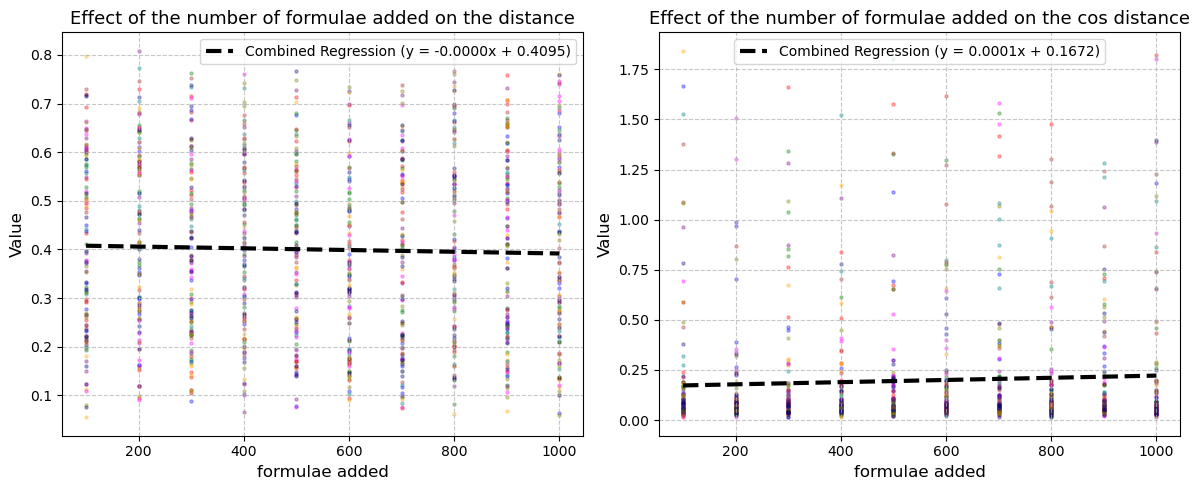

Regression Equation norm_global: y = 8.980833178709363e-06x + 0.3947450007227334
R² Score: 0.0002
Regression Equation norm_local: y = -5.8288262632595937e-05x + 0.2292035147457412
R² Score: 0.0030


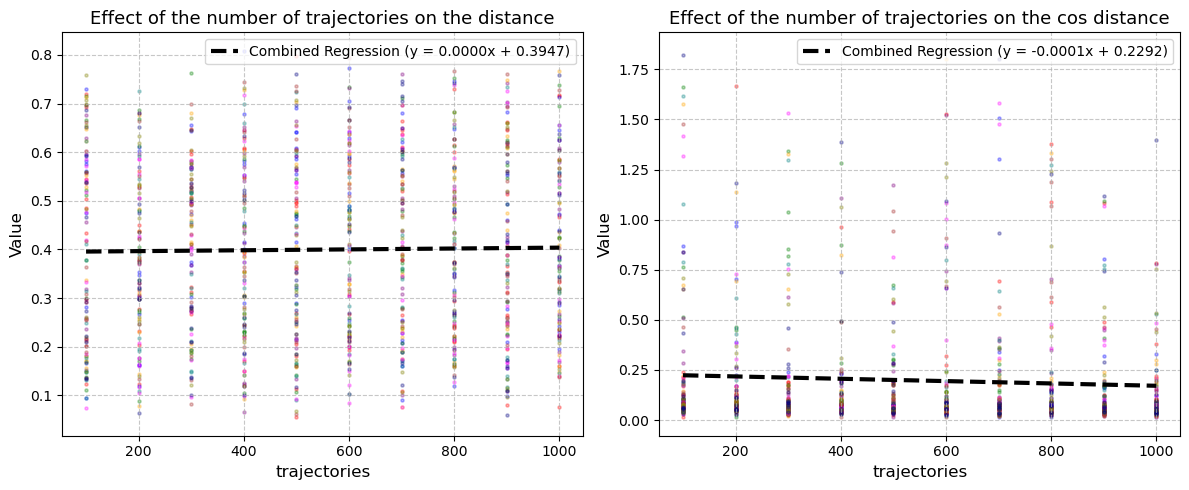

Regression Equation norm_global: y = -0.02331402274695309x + 0.417169946228916
R² Score: 0.0004
Regression Equation norm_local: y = 0.0571544394709847x + 0.1542791406945749
R² Score: 0.0009


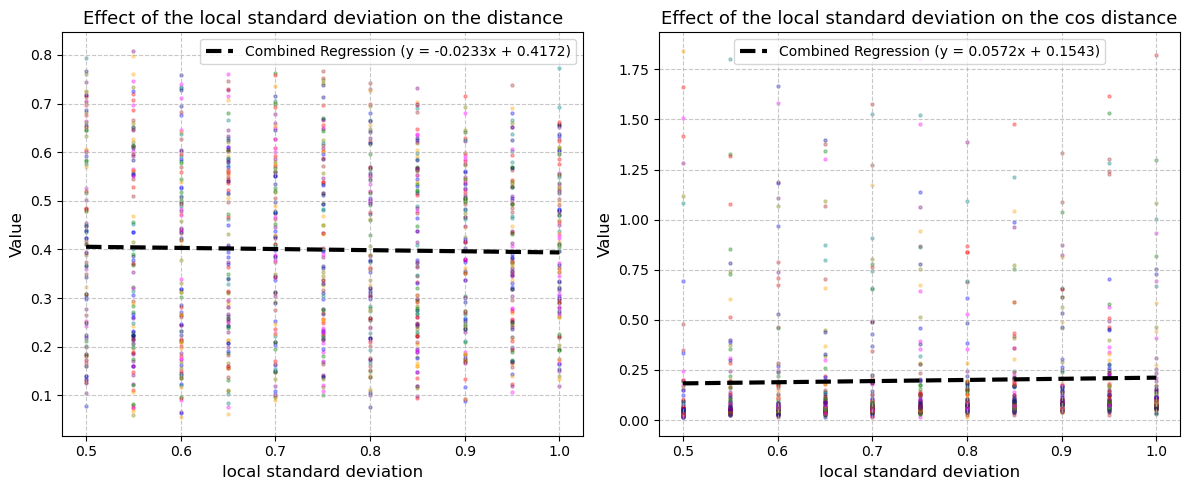

Regression Equation norm_global: y = 6.983757285868174e-07x + 0.2968136456292687
R² Score: 0.0000
Regression Equation norm_local: y = -1.7760066293980487e-05x + 0.40945609316229825
R² Score: 0.0008
Regression Equation norm_imp: y = -8.224552772236454e-10x + 4.446680939250314e-06
R² Score: 0.0001


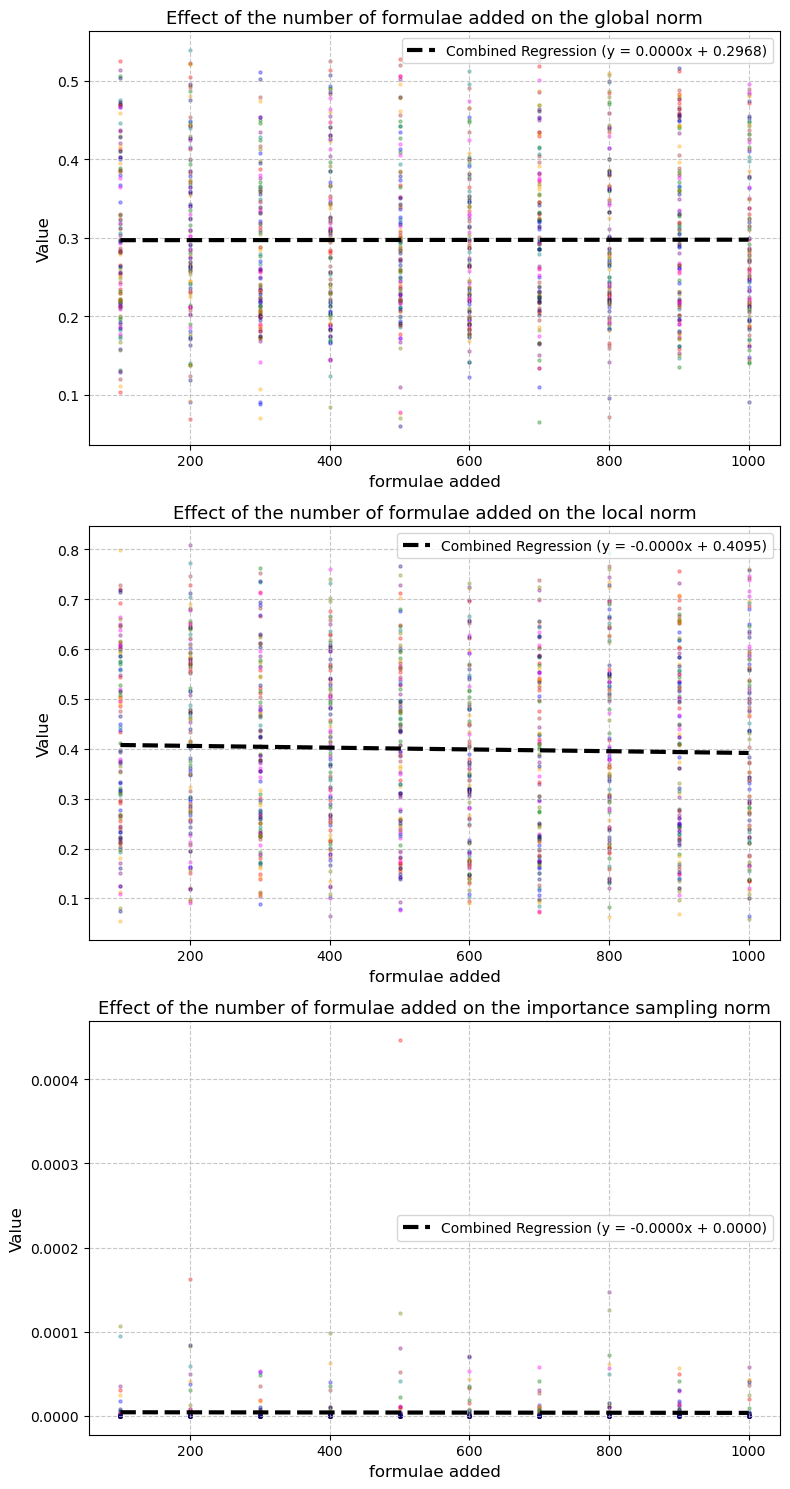

Regression Equation norm_global: y = -8.841285959255541e-07x + 0.2976840230077505
R² Score: 0.0000
Regression Equation norm_local: y = 8.97960961275522e-06x + 0.3947492714135936
R² Score: 0.0002
Regression Equation norm_imp: y = -1.4025234353849917e-09x + 4.765718426239054e-06
R² Score: 0.0004


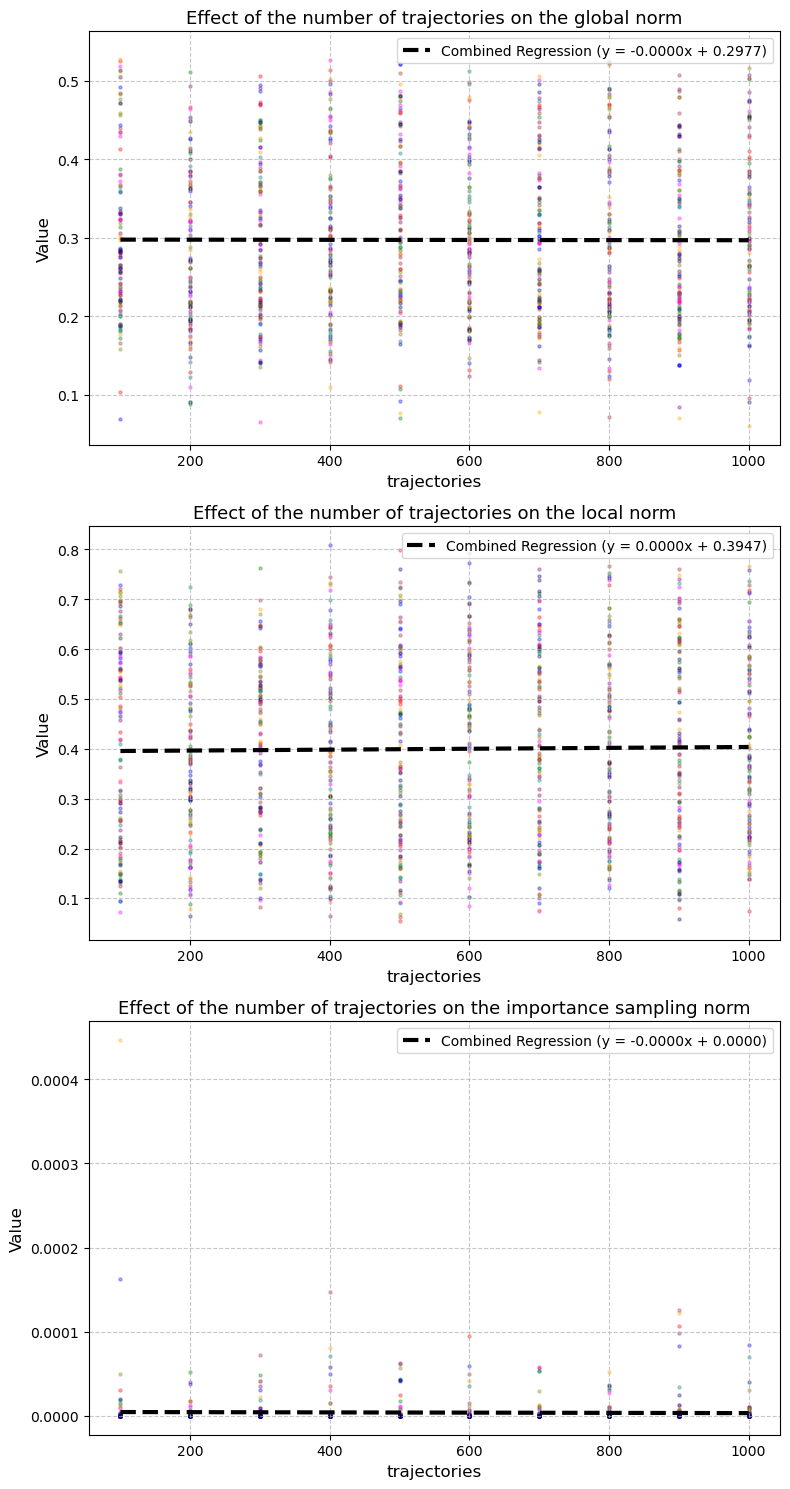

Regression Equation norm_global: y = 0.04788421949202364x + 0.26128458766097373
R² Score: 0.0054
Regression Equation norm_local: y = -0.02334907239133662x + 0.41719986099411144
R² Score: 0.0004
Regression Equation norm_imp: y = -3.8558486837722e-05x + 3.29131956650688e-05
R² Score: 0.0988


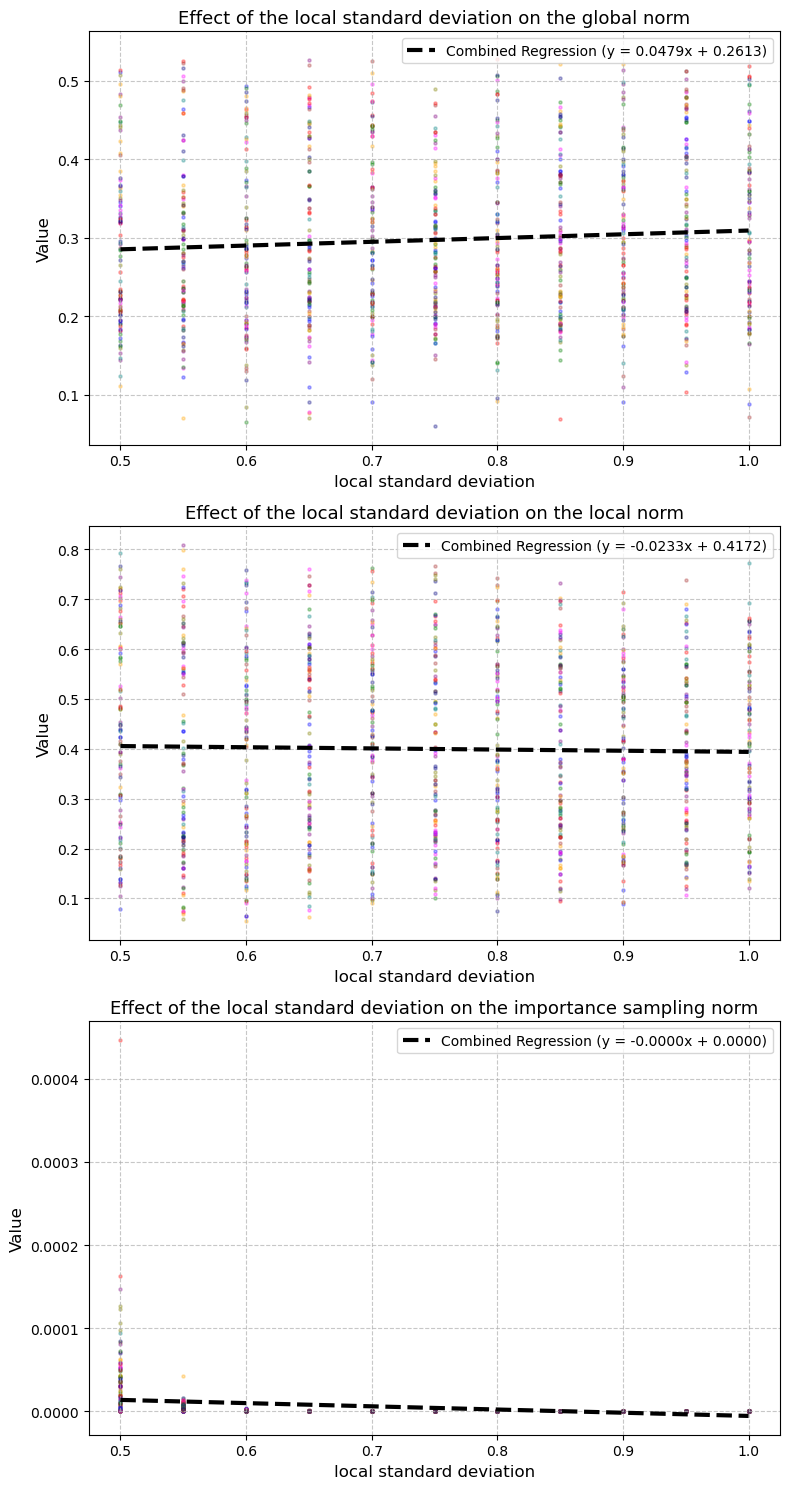

In [19]:
# Running the functions
for i in range(3):
    plotter(Distances_basic, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms_basic, parameter_index=i, variable="Norms")


In [4]:
# Loading the new arrays back
Distances_new = np.load('Distances_new.npy', allow_pickle=True)
Norms_new = np.load('Norms_new.npy', allow_pickle=True)

Regression Equation norm_global: y = nanx + nan
R² Score: nan
Regression Equation norm_local: y = nanx + nan
R² Score: nan


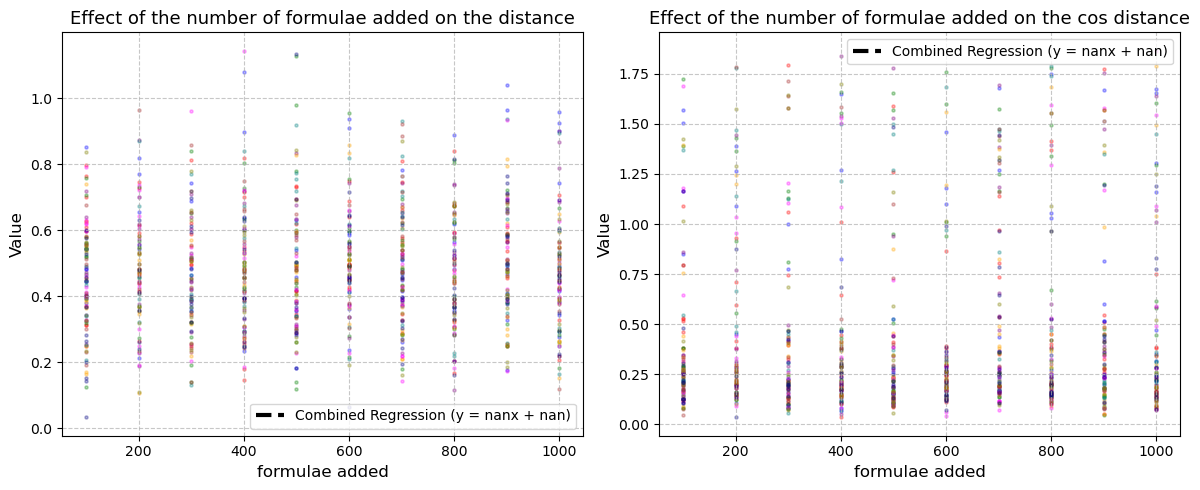

Regression Equation norm_global: y = nanx + nan
R² Score: nan
Regression Equation norm_local: y = nanx + nan
R² Score: nan


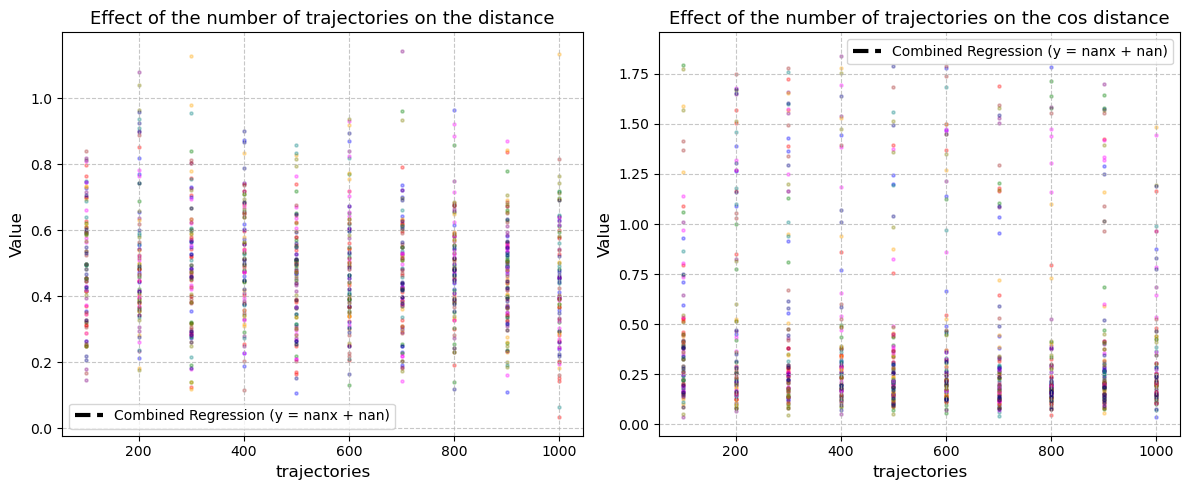

Regression Equation norm_global: y = nanx + nan
R² Score: nan
Regression Equation norm_local: y = nanx + nan
R² Score: nan


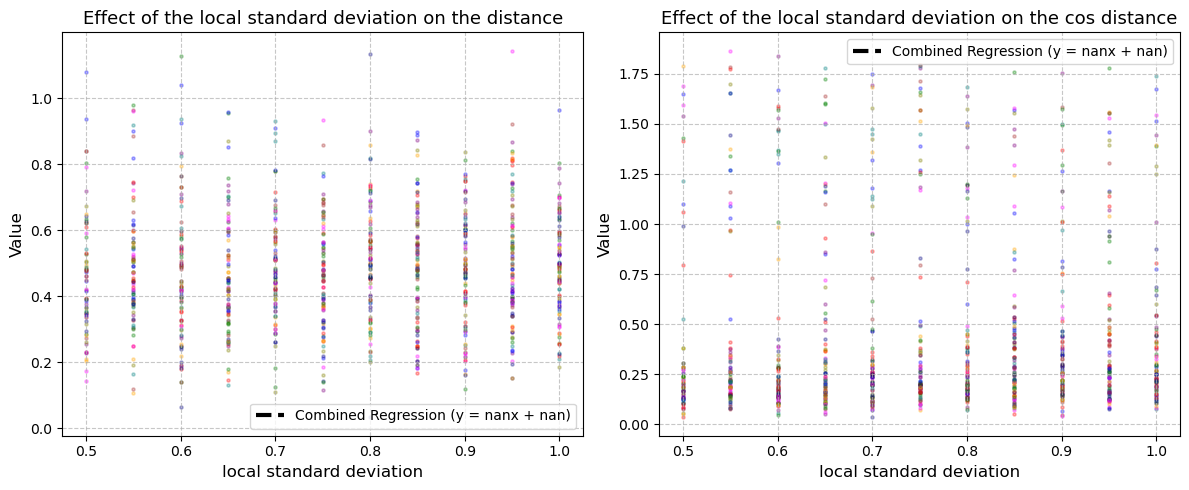

Regression Equation norm_global: y = 2.487233504858225e-06x + 0.2967981330734311
R² Score: 0.0001
Regression Equation norm_local: y = 1.464963394625128e-05x + 0.40628905122930353
R² Score: 0.0006
Regression Equation norm_imp: y = nanx + nan
R² Score: nan


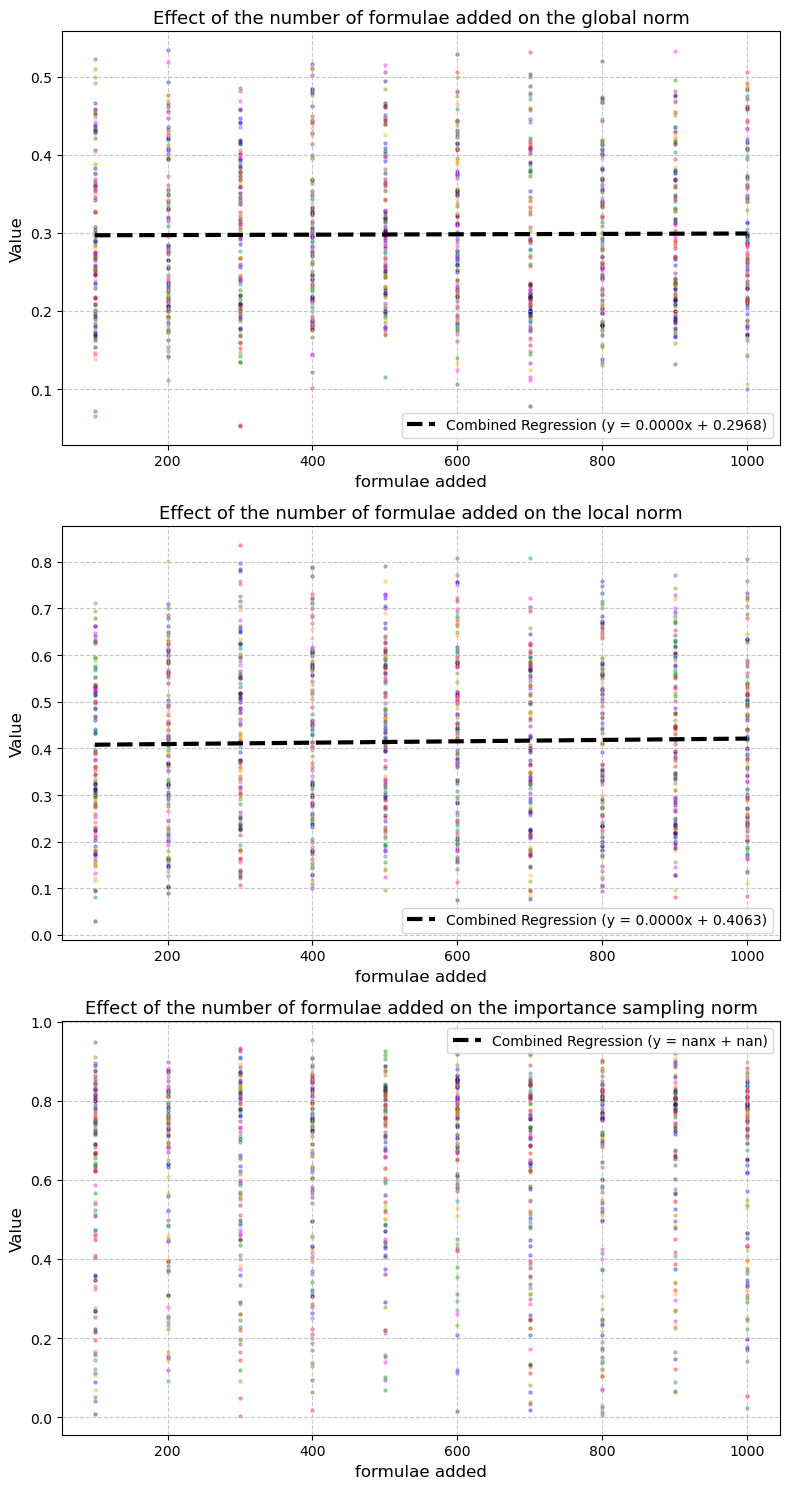

Regression Equation norm_global: y = -1.1542121255282843e-05x + 0.30451427819150867
R² Score: 0.0011
Regression Equation norm_local: y = 1.2822691244445188e-05x + 0.40729386971529685
R² Score: 0.0004
Regression Equation norm_imp: y = nanx + nan
R² Score: nan


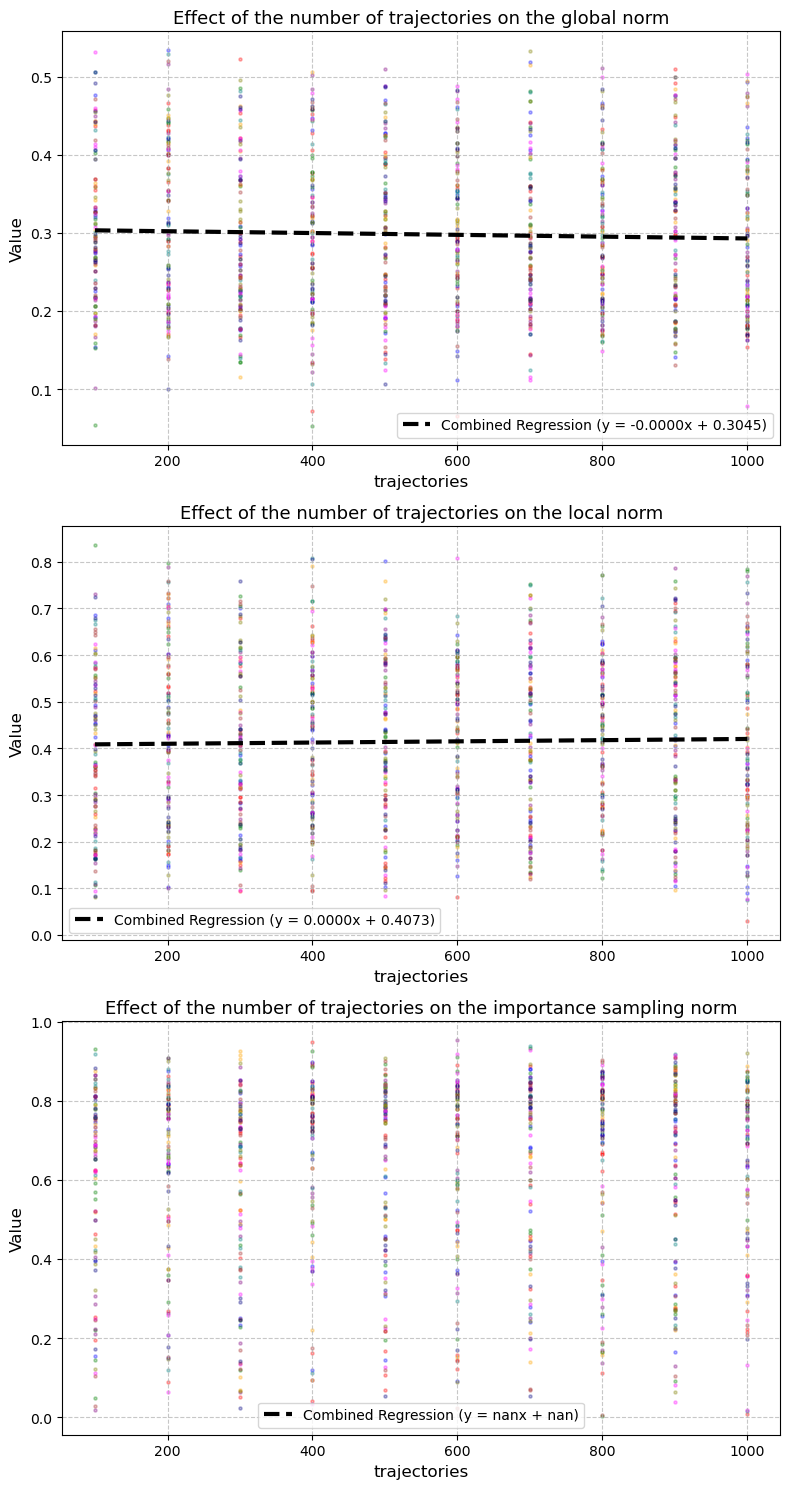

Regression Equation norm_global: y = -0.022394080500711084x + 0.31496167187663643
R² Score: 0.0013
Regression Equation norm_local: y = -0.12003375883129505x + 0.504371669023213
R² Score: 0.0116
Regression Equation norm_imp: y = nanx + nan
R² Score: nan


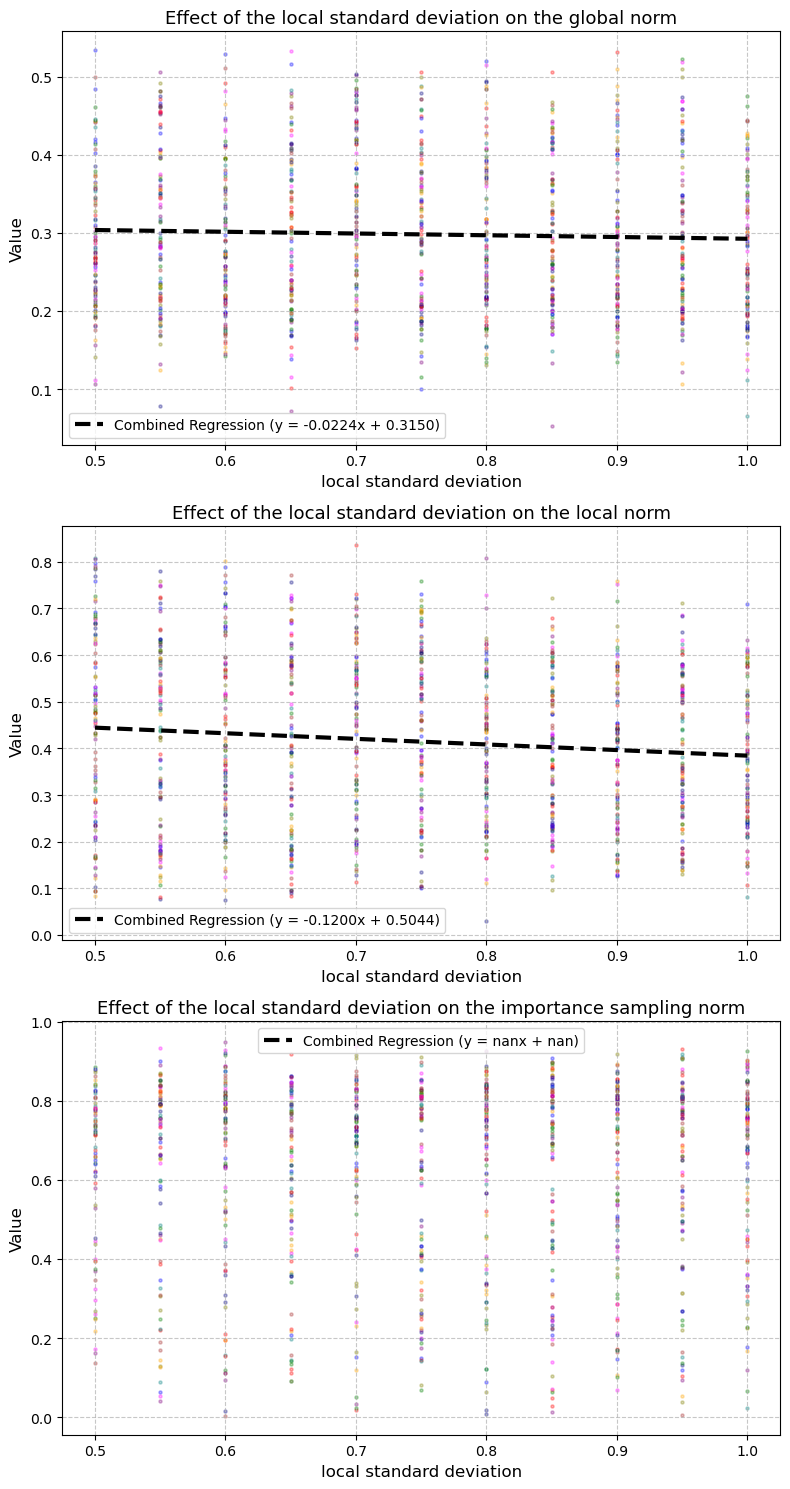

In [9]:
# Running the functions
for i in range(3):
    plotter(Distances_new, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms_new, parameter_index=i, variable="Norms")